In [1]:
import pandas as pd
import numpy as np
import talib as ta
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
start = '2019-07-01'
end = '2020-07-01'

df = data.DataReader('^N225', 'yahoo', start, end)

In [3]:
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-01,21758.339844,21559.169922,21566.269531,21729.970703,66900000,21729.970703
2019-07-02,21784.220703,21697.310547,21699.429688,21754.269531,54700000,21754.269531
2019-07-03,21708.720703,21566.650391,21684.070312,21638.160156,55000000,21638.160156
2019-07-04,21755.630859,21672.500000,21740.929688,21702.449219,37800000,21702.449219
2019-07-05,21746.380859,21647.730469,21703.609375,21746.380859,44800000,21746.380859
2019-07-08,21672.650391,21499.570312,21665.789062,21534.349609,51900000,21534.349609
2019-07-09,21687.289062,21508.220703,21598.150391,21565.150391,53900000,21565.150391
2019-07-10,21601.859375,21488.220703,21499.460938,21533.480469,58900000,21533.480469
2019-07-11,21649.929688,21532.570312,21547.189453,21643.529297,49600000,21643.529297


In [4]:
#日付をdate変数に代入
date = df.index
#終値をclose変数に代入
close = df['Adj Close']

In [5]:
span01 = 5
span02 = 25
span03 = 50

df['sma01'] = close.rolling(window=span01).mean()
df['sma02'] = close.rolling(window=span02).mean()
df['sma03'] = close.rolling(window=span03).mean()


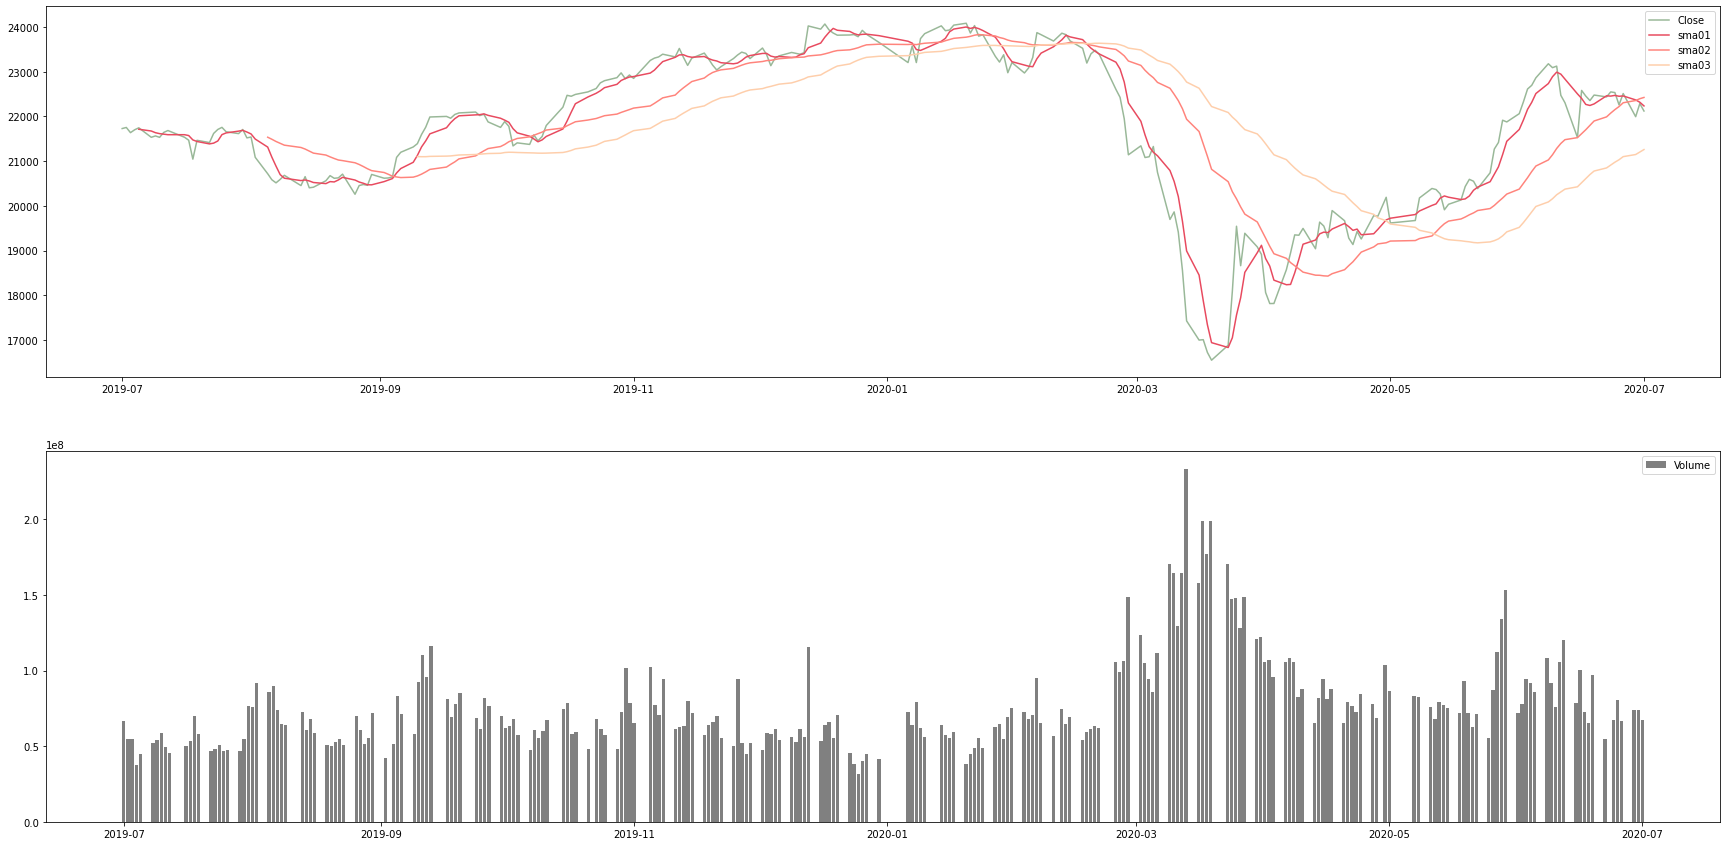

In [6]:
plt.figure(figsize=(30,15))
plt.subplot(2,1,1,)

plt.plot(date, close, label='Close', color='#99b898')
plt.plot(date, df['sma01'], label='sma01', color='#e84a5f')
plt.plot(date, df['sma02'], label='sma02', color='#ff847c')
plt.plot(date, df['sma03'], label='sma03', color='#feceab')
plt.legend()

plt.subplot(2,1,2)
plt.bar(date, df['Volume'], label='Volume', color='grey')
plt.legend()

In [7]:
#MACDを実装
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

In [8]:
df.head(10)

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist
Date,,,,,,,,,,,,
2019-07-01,21758.339844,21559.169922,21566.269531,21729.970703,66900000,21729.970703,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-02,21784.220703,21697.310547,21699.429688,21754.269531,54700000,21754.269531,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-03,21708.720703,21566.650391,21684.070312,21638.160156,55000000,21638.160156,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-04,21755.630859,21672.500000,21740.929688,21702.449219,37800000,21702.449219,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-05,21746.380859,21647.730469,21703.609375,21746.380859,44800000,21746.380859,21714.246094,NaN,NaN,NaN,NaN,NaN
2019-07-08,21672.650391,21499.570312,21665.789062,21534.349609,51900000,21534.349609,21675.121875,NaN,NaN,NaN,NaN,NaN
2019-07-09,21687.289062,21508.220703,21598.150391,21565.150391,53900000,21565.150391,21637.298047,NaN,NaN,NaN,NaN,NaN
2019-07-10,21601.859375,21488.220703,21499.460938,21533.480469,58900000,21533.480469,21616.362109,NaN,NaN,NaN,NaN,NaN
2019-07-11,21649.929688,21532.570312,21547.189453,21643.529297,49600000,21643.529297,21604.578125,NaN,NaN,NaN,NaN,NaN


In [9]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03,macd,macdsignal,macdhist
Date,,,,,,,,,,,,
2020-06-25,22423.410156,22165.140625,22287.869141,22259.789062,80800000,22259.789062,22451.843750,22221.268437,21032.862969,375.920739,490.144488,-114.223749
2020-06-26,22589.140625,22408.269531,22424.369141,22512.080078,66600000,22512.080078,22458.501953,22306.225234,21102.236562,357.802813,463.676153,-105.873340
2020-06-29,22281.380859,21969.589844,22255.050781,21995.039062,73700000,21995.039062,22370.055859,22356.360781,21149.361133,298.284895,430.597901,-132.313007
2020-06-30,22448.300781,22273.380859,22335.099609,22288.140625,74200000,22288.140625,22317.873828,22397.039609,21204.122148,271.636110,398.805543,-127.169433
2020-07-01,22360.310547,22039.560547,22338.300781,22121.730469,67400000,22121.730469,22235.355859,22425.139609,21260.752773,234.386981,365.921831,-131.534850


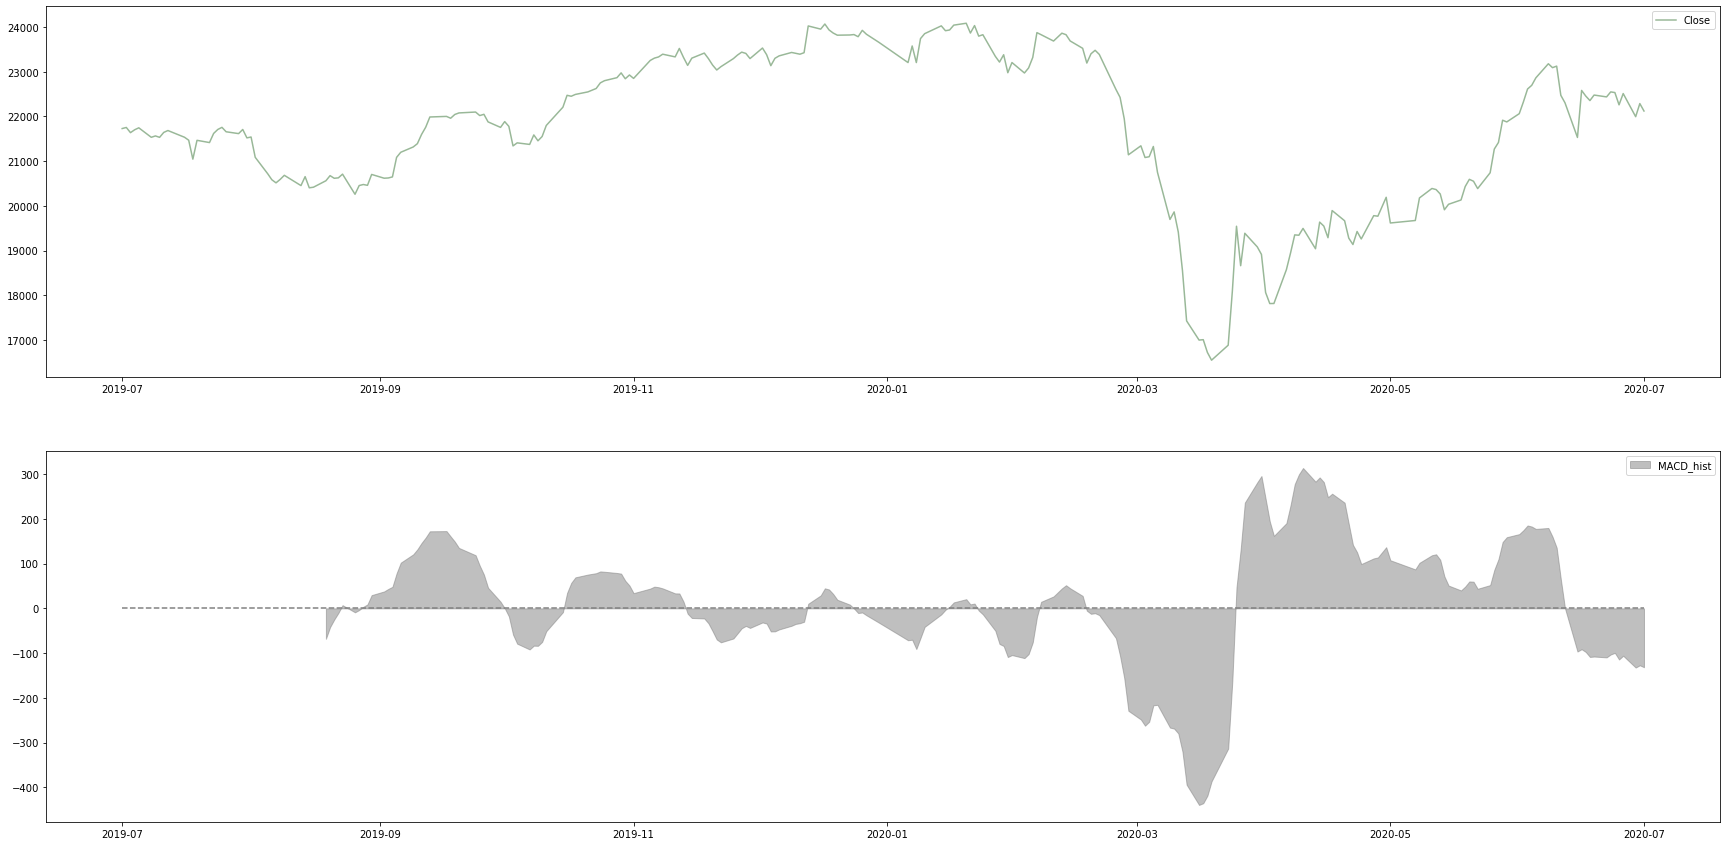

In [15]:
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date, close, label='Close', color='#99b898')
plt.legend()

plt.subplot(2,1,2)
plt.fill_between(date, df['macdhist'], color='grey', alpha=0.5, label='MACD_hist')
plt.hlines(0, df.index.min(), df.index.max(), "grey", linestyles="dashed")
plt.legend()

In [ ]:
#RSI